# TAREA 3
- José Castillo

In [284]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from numpy.matlib import repmat

## Parte 2


Genere una imagen con ruido empleando el siguiente código (no lo modifique).  Luego desarrolle un 
filtro en la frecuencia para reducir dicho ruido. Usted debe definir el filtro más apropiado.

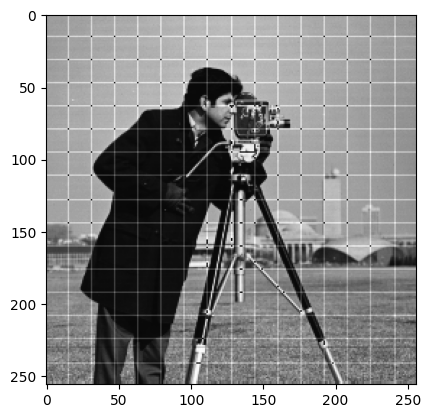

In [285]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt     
 
img = cv2.imread('cameraman.png',cv2.IMREAD_GRAYSCALE) 
m = img.shape[0] 
delta = 15 
V = np.fix(np.linspace(delta,m-delta,delta)).astype('uint8') 
 
img[V,:] = img[V,:]+50 
img[:,V] = img[:,V]+50 
plt.imshow(img, cmap='gray') 
plt.show() 




Tranformada de Forier

In [286]:
#Funciones Filtro

#Filtro pasa bajos/altos ideal
def filtro_pasa_ideal(imagen, r,tipo):
    x= np.linspace(-127, 128,256)
    y= np.linspace(-127, 128,256)
    X, Y = np.meshgrid(x,y)

    if tipo == 'bajos':
        Z = np.sqrt(np.power(X,2)+np.power(Y,2))<r
    if tipo == 'altos':
        Z = np.sqrt(np.power(X,2)+np.power(Y,2))>r
    F = np.fft.fft2(imagen)
    fshift = np.fft.fftshift(F)
    fshift = fshift*Z

    # Transformada inversa de Fourier
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    # Normalizar la imagen para visualización
    out = cv2.normalize(img_back, None, 0.0, 1.0, cv2.NORM_MINMAX)

    return out


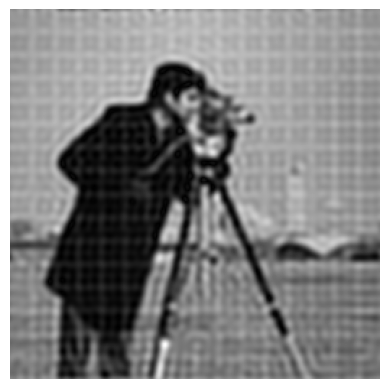

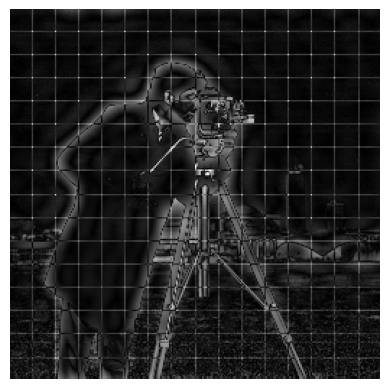

In [287]:

plt.imshow(filtro_pasa_ideal(img, 35,"bajos"), cmap='gray'),plt.axis('off')
plt.show()
plt.imshow(filtro_pasa_ideal(img, 10,"altos"), cmap='gray'),plt.axis('off')
plt.show()

Filtro pasabajos gaussiano

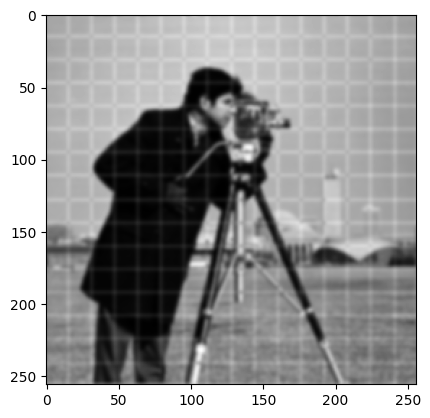

In [288]:
x= np.linspace(-127, 128,256)
y= np.linspace(-127, 128,256)
X, Y = np.meshgrid(x,y)

#creamos el filtro
H= np.exp(-0.0005*(X**2+Y**2))
UH = np.fft.fftshift(H)

F     = np.fft.fft2(img)
FILT= UH*F
S    = np.fft.ifft2(np.fft.fftshift(FILT))
outpasabajos_gaussiano = cv2.normalize(abs(S), None, 0.0, 1.0, cv2.NORM_MINMAX)

plt.imshow(outpasabajos_gaussiano,cmap="gray")
plt.show()

In [289]:
def btw_pts(x,y,M,N,n,fc):
# Aplicacion del filtro Butterworth 
# en una posicion especifica

# x: posicion en x (fila)
# y: posicion en y (columna)
# M: filas de la imagen
# N: columnas de la imagen
# n: orden del filtro
# fc: frecuencia de corte
# Calculo de la malla
 
    vx=np.linspace(-M/2, M/2, M)
    vy=np.linspace(-N/2, N/2, N)
    U,V=np.meshgrid(vy,vx)
    f= np.sqrt(U**2+V**2)

    T=np.ones([M,N])
    # para cada punto de la lista
    #print(len(x))
    for i in range(0, len(x)):
        
        #filtro de butterworth centrado
        H = 1- 1/(1+ (f/fc)**(2*n))
     
        # Movemos el punto del centro
        # a la posicion deseada
        a= x[i]- M/2
        b= y[i]- N/2
        H = np.roll(H, int(a), axis=0)
        H = np.roll(H, int(b), axis=1)

        T= T*H

    #Convertimos el filtro
    res= 1-T
    return (res)

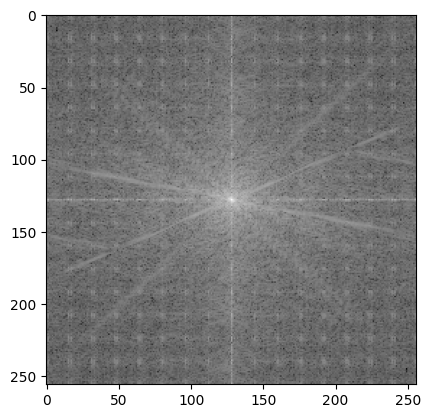

In [290]:
F = np.fft.fft2(img)
fshift = np.fft.fftshift(F)
plt.imshow(np.log(np.abs(fshift)),cmap="gray")

In [291]:
def marcar_frecuencia(imagen_ruido, a):
    m, n = imagen_ruido.shape
    intersecciones = []

    plt.figure(figsize=(10, 10))
    plt.imshow(np.log(np.abs(imagen_ruido)), cmap="gray")
    
    # Agregar líneas verticales
    for e in range(0, n, a):
        plt.axvline(x=e, color='r', linestyle='--')  # Línea vertical
    
    # Agregar líneas horizontales
    for e in range(0, m, a):
        plt.axhline(y=e, color='b', linestyle='--')  # Línea horizontal
    
    # Guardar intersecciones
    for x in range(0, n, a):
        for y in range(0, m, a):
            intersecciones.append((x, y))
    
    plt.title("FFT")
    plt.show()

    return intersecciones

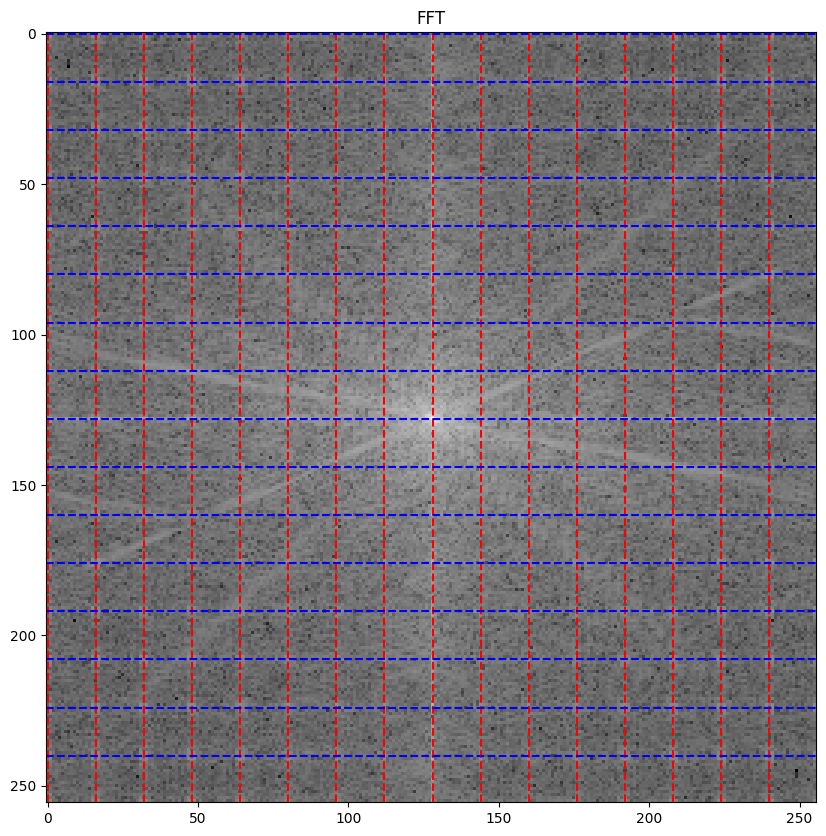

In [292]:
interseciones=marcar_frecuencia(fshift,16)




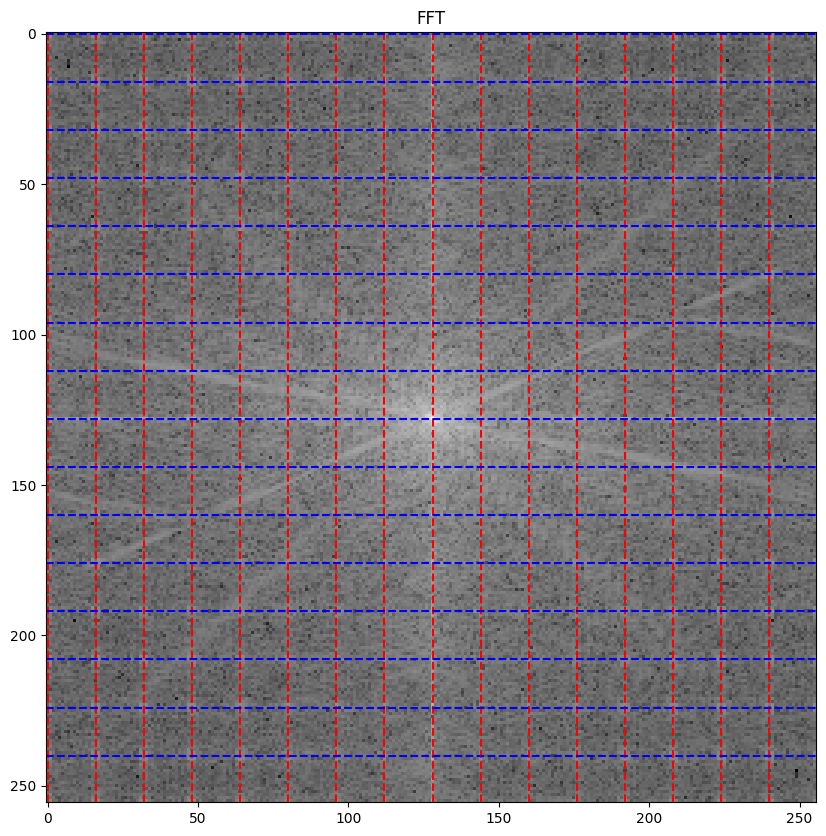

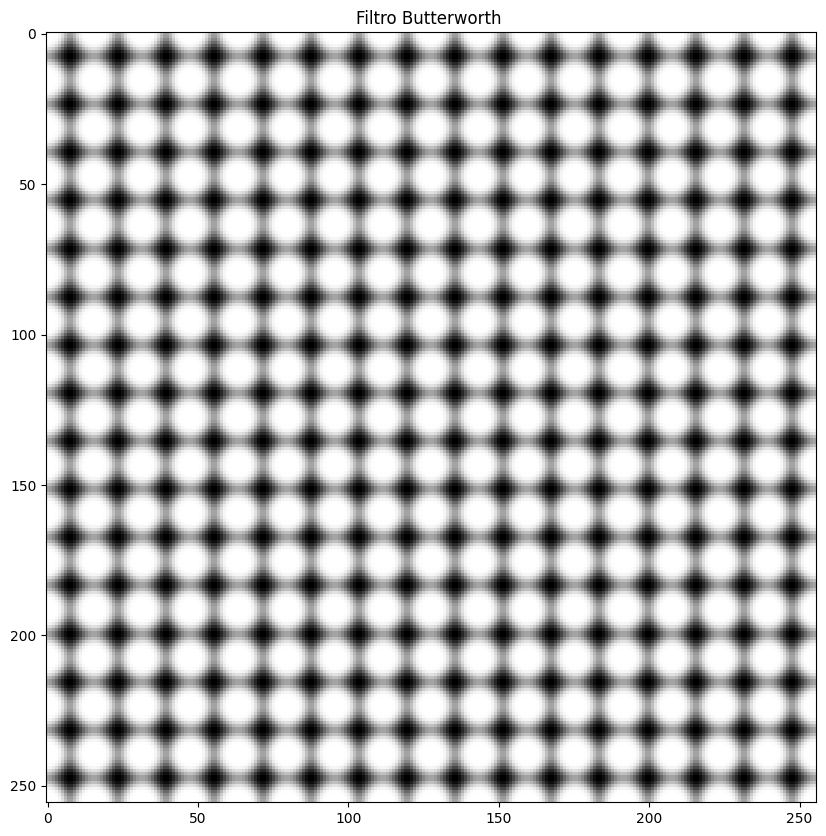

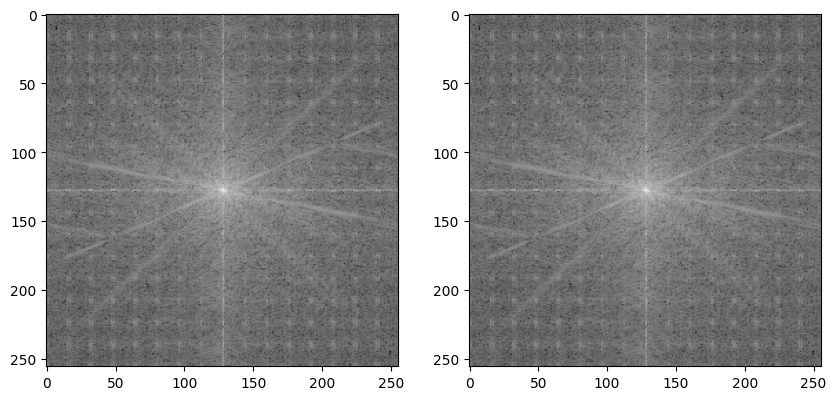

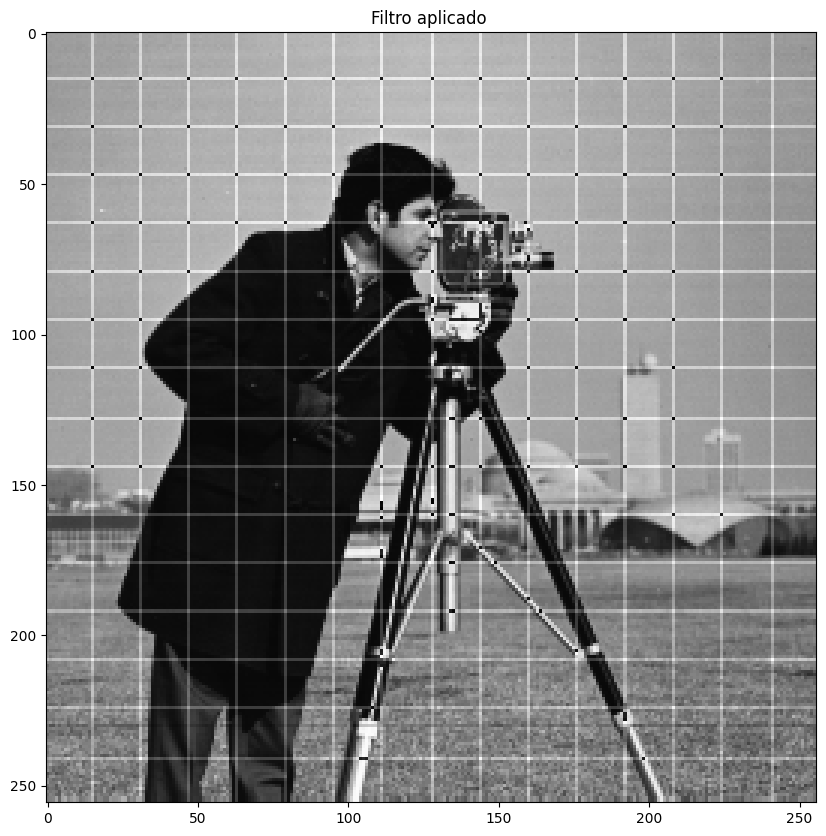

In [293]:

# Ejemplo de uso
a = 16
intersecciones = marcar_frecuencia(fshift, a)

x, y = zip(*intersecciones)  # Desempaquetar las intersecciones en listas de x e y
M, N = fshift.shape
n = 5
fc = 16
filtro = btw_pts(x, y, M, N, n, fc)

ef= fshift*filtro

# Determinamos la imagen del ruido
eta = np.real(np.fft.ifft2(np.fft.fftshift(ef)))

# Mostrar el filtro resultante
plt.figure(figsize=(10, 10))
plt.imshow(filtro, cmap="gray")
plt.title("Filtro Butterworth ")
plt.show()
#
plt.figure(figsize=(10, 10))
plt.subplot(121),plt.imshow(np.log(np.abs(fshift)), cmap="gray")
plt.subplot(122),plt.imshow(np.log(np.abs(ef)), cmap="gray")
plt.show()
# Mostrar el filtro resultante
plt.figure(figsize=(10, 10))

plt.imshow(eta, cmap="gray")
plt.title("Filtro aplicado ")
plt.show()


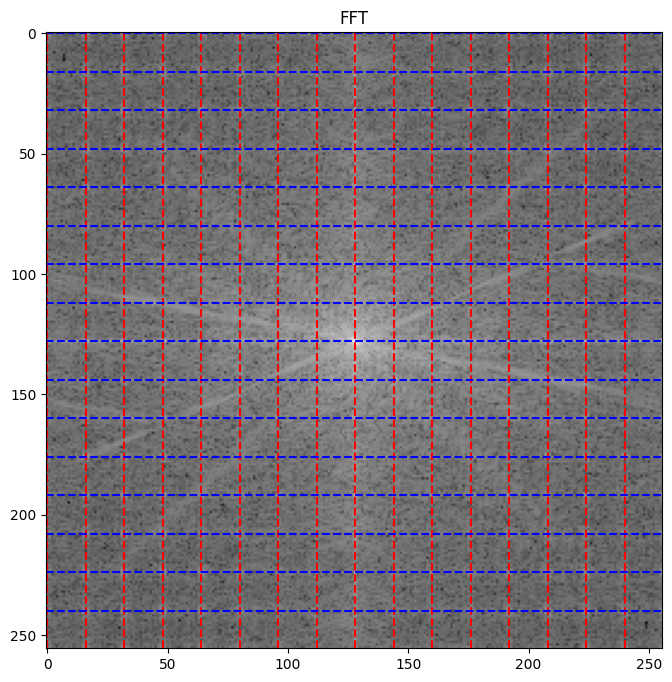

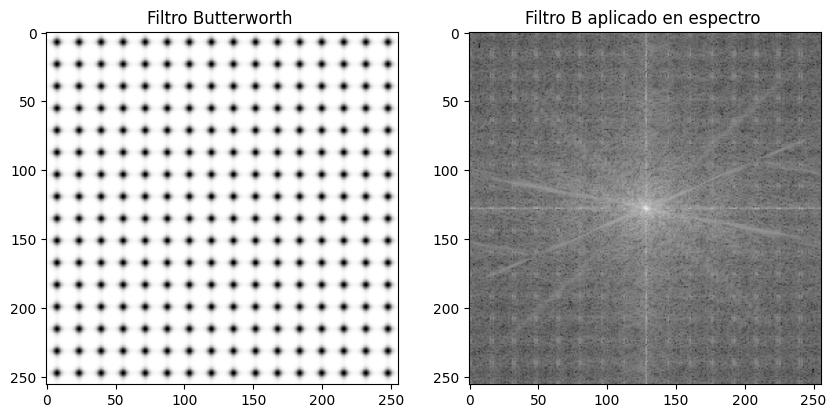

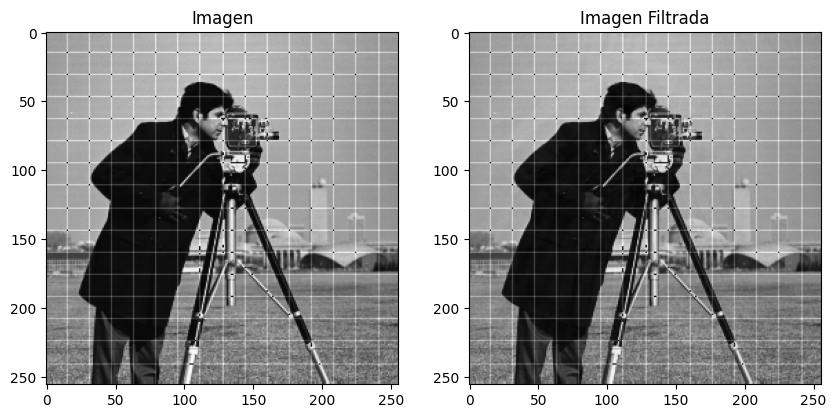

In [294]:
import numpy as np
import matplotlib.pyplot as plt

def marcar_frecuencia(imagen_ruido, a):
    m, n = imagen_ruido.shape
    intersecciones = []

    plt.figure(figsize=(8, 8))
    plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(imagen_ruido)))), cmap="gray")
    
    # Agregar líneas verticales
    for e in range(0, n, a):
        plt.axvline(x=e, color='r', linestyle='--')  # Línea vertical
    
    # Agregar líneas horizontales
    for e in range(0, m, a):
        plt.axhline(y=e, color='b', linestyle='--')  # Línea horizontal
    
    # Guardar intersecciones
    for x in range(0, n, a):
        for y in range(0, m, a):
            intersecciones.append((x, y))
    
    plt.title("FFT")
    plt.show()

    return intersecciones

def btw_pts(x, y, M, N, n, fc):
    # Aplicacion del filtro Butterworth en una posicion especifica

    # x: posicion en x (fila)
    # y: posicion en y (columna)
    # M: filas de la imagen
    # N: columnas de la imagen
    # n: orden del filtro
    # fc: frecuencia de corte
    
    # Calculo de la malla
    vx = np.linspace(-M/2, M/2, M)
    vy = np.linspace(-N/2, N/2, N)
    U, V = np.meshgrid(vy, vx)
    f = np.sqrt(U**2 + V**2)

    T = np.ones([M, N])
    
    # para cada punto de la lista
    for i in range(len(x)):
        # filtro de butterworth centrado
        H = 1 - 1/(1 + (f/fc)**(2*n))
        
        # Movemos el punto del centro a la posicion deseada
        a = x[i] - N/2
        b = y[i] - M/2
        H = np.roll(H, int(a), axis=1)
        H = np.roll(H, int(b), axis=0)

        T = T * H

    #Convertimos el filtro
    res = 1 - T
    return res

# Ejemplo de uso
imagen_ruido = img
a = 16
intersecciones = marcar_frecuencia(imagen_ruido, a)

x, y = zip(*intersecciones)  # Desempaquetar las intersecciones en listas de x e y
M, N = imagen_ruido.shape
n = 5
fc = 10
filtro = btw_pts(x, y, M, N, n, fc)

# Aplicar el filtro a la imagen en el dominio de Fourier
imagen_fft = np.fft.fftshift(np.fft.fft2(imagen_ruido))
imagen_filtrada_fft = imagen_fft * filtro
imagen_filtrada = np.fft.ifft2(np.fft.ifftshift(imagen_filtrada_fft)).real

# Mostrar el filtro y la imagen filtrada
plt.figure(figsize=(10, 10))
plt.subplot(121),plt.imshow(filtro, cmap="gray"),plt.title("Filtro Butterworth ")
plt.subplot(122),plt.imshow(np.log(np.abs(imagen_filtrada_fft)), cmap="gray"),plt.title("Filtro B aplicado en espectro ")
plt.show()

plt.figure(figsize=(10, 10))
plt.subplot(121),plt.imshow(img, cmap="gray"),plt.title("Imagen")
plt.subplot(122),plt.imshow(imagen_filtrada, cmap="gray"),plt.title("Imagen Filtrada")
plt.show()


